# **HOTEL CANCELATION'S PREDICTIONS**

Made by : Muhammad Alditya Prasetyawan
Class   : DTI-DS 0106

**Table of Content**
1. Business Problem Understanding
2. Data Understanding

<br>

## **Business Understanding**

#### **Context**
Portugal, renowned for its rich history dating back to the medieval era, is celebrated for its remarkable architecture, distinguished naval history, and significant Catholic heritage sites. The country's allure naturally attracts numerous tourists, contributing to a thriving hotel industry. To support the robust tourism sector, effective management of the hotel industry is crucial. Based on [Revfine](https://www.revfine.com/tourism-industry/), hotel industry is included in top 3 sector that support tourism.

#### **Problem Statement**
Hotel industry normally has numerous challenges and one of them is customer booking's cancellation. This cancellation booking might cripples the hotel industry, especially in operational sector, therefore it is vital to determine operational cost [Article](https://shrgroup.com/2023/06/21/we-need-to-talk-about-cancellations/#:~:text=Now%20in%202022%2C%20our%20latest,2019%20for%20the%20same%20period). Moreover, Based on the findings, one of the main unnecessary cost loss is because of food spending[Article](https://www.hospitalitynet.org/opinion/4112912.html).

#### **Project Stakeholders**
The stakeholders who will utilize this model include:

* Operational Department: This department will handle the food supply, run the food operations and manage food storage. Therefore, they require specific calculation and budget for food operations.
* Finance Department: One of the Finance Department's tasks is to manage the company's income and expenses, which include the costs incurred from customer needs (ex. breakfast, fixed cost, etc).

#### **Project Goals**
The main goal here is to create an effective classification model. This model's job is to predict the limit of hotel expenditure on food and calculate the potential revenue of food distribution strategy. It's important that this model is good at predicting customers that will cancel the booking. This strategy will help the hotel to use their resources better, make their interactions with customer more effective, get better rating and ultimately, generating more sustainable revenue.

#### **Metric Evaluation:**
This analysis will focus on customers cancellations. The targets are defined as follows:

* 0: indicates a customer who does not cancel the booking.
* 1: represents a customer who does cancel the booking.

Ensuring the accuracy of our model is crucial to avoid the financial repercussions of misclassification, which could come in the `form of False Positive or False Negatives`.

| **Error Type**     |**Explanation** | **Consequences** | 
|-----------------|------------|----------------|
| **False Positive / Type 1 Error**  |A situation where customers are predicted to **cancel** their bookings but, in reality, do not cancel them.| Average food cost in Portugal is [8 EUR](https://authentik.com/be-en/destinations/portugal/faq/calculate-food-budget). If The food cost calculation is not effectively targeted, resulting in excess loss. Without machine learning models it will create `financial loss up to 10 EUR`. |
| **False Negative / Type 2 Error**  | A situation where customers are predicted not to cancel their bookings but, in reality, do cancel them.| The hotel loses potential customers, which results in lost revenue. Therefore, in the worst case, the hotel earns `90 EUR after deducting 8 EUR food costs`.| 

<br>

## **Data Understanding**

#### **About the Dataset**
For this project, we are using Hotel Booking Demand from [Drive](https://drive.google.com/drive/folders/17KIeOXK7eYGuzgpn_IljlUFcE4v96lSL). This data set contains booking information for a hotel in portugal and includes information such as country, booking changes, number of available parking spaces, and many other. The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

#### **Features**

| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| country | country of origin |
| market_segment | Market segment designation |
| previous_cancellations | Number of previous bookings that were cancelled by the customer prior to the current booking |
| booking_changes | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation |
| deposit_type | Indication on if the customer made a deposit to guarantee the booking |
| days_in_waiting_list |  Number of days the booking was in the waiting list before it was confirmed to the customer |
| customer_type | Type of booking |
| reserved_room_type | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
| required_car_parking_space | Number of car parking spaces required by the customer |
| total_of_special_request | Number of special requests made by the customer (e.g. twin bed or high floor) |
| is_canceled | Value indicating if the booking was canceled (1) or not (0) |

#### **Data Types**

Before conducting another process, it is essential to comprehend the data types associated with each column. Below is the table illustrating the data types along with their corresponding columns:

| Type       | Category  | Columns                                                                                         |
|------------|-----------|------------------------------------------------------------------------------------------------|
| Numerical  | Discrete  | previous_cancellations, booking_changes, days_in_waiting_list, required_car_parking_spaces, total_of_special_request |
|            | Continuous|                                                                       |
| Categorical| Ordinal   |                                                                                     |
|            | Nominal   | country, market_segment, deposit_type, customer_type, reserved_room_type|
|            | Nominal(Binary) | is_canceled|


<br>

## **Data Preparation**


#### **Initial Setup**

In [63]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import missingno as msn
import math

import warnings
warnings.filterwarnings('ignore')

#### **Load Dataset**

In [64]:
df = pd.read_csv('data_hotel_booking_demand.csv').copy()
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [65]:
numerical_columns = ['previous_cancellations', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests', 'days_in_waiting_list']
categorical_columns = ['country', 'market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']
target = ['is_canceled']

First of all we want to manually define which data is categorical and numerical, by that we can define using pandas if the data trully numerical or categorical

#### **Create Supporting Function**

In [66]:
def count_outlier(col):
    if pd.api.types.is_numeric_dtype(df[col]):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        upper_whisker = q3+ 1.5 * iqr
        lower_whisker = q1 - 1.5 * iqr

        if lower_whisker == 0:
            return 0
        else:
            counts = len(df[(df[col] > upper_whisker) | (df[col] < lower_whisker)])
            return counts

This function, is to count how many outlier in the dataset especiall in dataset column

In [67]:
def count_rare_values(df):
    rare_threshold = 0.05
    rare_counts = []

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            rare_values_count = df[df[col].map(df[col].value_counts(normalize=True)) <= rare_threshold].shape[0]
        else:
            value_counts = df[col].value_counts(normalize=True)
            rare_values_count = (value_counts <= rare_threshold).sum()

        rare_counts.append(rare_values_count)

    return rare_counts

Rare values is the value that appears less than 5%. We want to detect rare value since it may leads the model to overfitting

#### **Initial Review**

In [68]:
pd.DataFrame({'feature': df.columns,
              'type': df.dtypes.values,
              'null': [df[col].isna().sum() for col in df.columns],
              'null %': df.isna().mean().values * 100,
              'category': ['numerical' if pd.api.types.is_numeric_dtype(df[col]) else 'categorical' for col in df.columns],
              'n_outliers' : [count_outlier(col) for col in df.columns],
              'rare values < 5%' : count_rare_values(df),
              'nunique': df.nunique().values,
              'unique': [df[col].unique() for col in df.columns]
              })

,feature,type,null,null %,category,n_outliers,rare values < 5%,nunique,unique
0,country,object,351,0.419992,categorical,NaN,157,162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, B..."
1,market_segment,object,0,0.000000,categorical,NaN,4,8,"[Offline TA/TO, Online TA, Direct, Groups, Cor..."
2,previous_cancellations,int64,0,0.000000,numerical,0.0,306,15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19,..."
3,booking_changes,int64,0,0.000000,numerical,0.0,3737,19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12,..."
4,deposit_type,object,0,0.000000,categorical,NaN,1,3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,int64,0,0.000000,numerical,0.0,2585,115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31..."
6,customer_type,object,0,0.000000,categorical,NaN,2,4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,object,0,0.000000,categorical,NaN,7,10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,int64,0,0.000000,numerical,0.0,25,5,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,int64,0,0.000000,numerical,2051.0,2051,6,"[0, 2, 1, 3, 4, 5]"


From the table above it shows that, there are 10 columns of row that has only object and integer data types. Meanwhile, there is a missing value in country column by 351 rows. The missing value in the country column represents 0.4% from the total rows. Moreover, there are some outliers in total_of_special_requests column by 2051 outliers. Furthermore, There are some rare values in almost every column of the data. Rare value is a value that doesnt usually appear and the appearance only exist below 5%.

#### **Duplicate Rows**

In [69]:
df[df.duplicated()]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
7,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
22,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
29,PRT,Online TA,0,0,No Deposit,0,Transient,A,0,1,0
34,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
44,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


The table above shows that, there are numerous duplicated rows in our dataset by 73.371 rows. This implies that, more features is actually needed to differentiate each customer bookings. However, due to many redundant duplicated values and might disturb the machine learning model, therefore the duplicated row will be dropped and not taken into consideration

#### **Statistical Review**

In [70]:
display(df.describe(), df.describe(include='object'))

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83222,83573,83573,83573,83573
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39460,73352,62732,60041


#### **Imbalance Review**

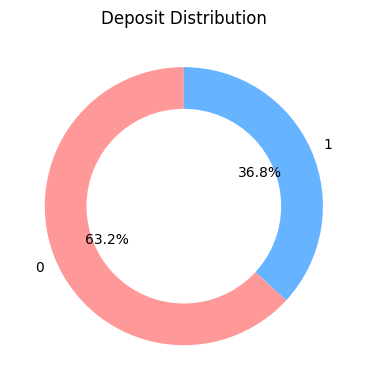

In [71]:
cancel_counts = df['is_canceled'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(cancel_counts, labels=cancel_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Deposit Distribution')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

#### **Description Sumary**
`Missing Values:`
* There are 351 identified missing columns in the country columns, that represents 0.4% of the total row. This missing value could disturb the modelling process and our modelling predictions. Therefore we will drop this missing value

`Duplicate Data`
* There are 73.371 rows that has the duplicate details one another. This duplicated value will be dropped since there are too many of repeated value.

`Outliers:`
* There are outliers in total_of_special_requests column by 2051 rows. However, this the statiscal review stated that the maximum total_of_special_requests is only 5. Therefore in the modeling, I will use robust scaler instead deleting the outlier.

`Rare Value`
* Almost every column in the dataset has rare value which is a value that only hold less than 5% from the total column. Rare values might resulting the modelling to be overfit, therefore it has to be taken into consideration.

`Imbalance`
* From the pie chart, we know that there is an imbalance between 1 and 0, where 0 holds 63.2% and 1 only hold 36.8%. This means that in modeling section, class imbalance need to put into the consideration since class imbalance can shift the model into majority oriented.

<br>

## **Explanatory Data Analysis (EDA)**

#### **Create a Supporting Functions**

In [72]:
def plot_proportions(df, columns):

    n_cols = 2
    n_rows = len(columns) // n_cols + (len(columns) % n_cols > 0)
    
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows*5))
    axes = axes.flatten()  
    
    for ax, column in zip(axes, columns):
        # Calculate the value counts and their proportions
        value_counts = df[column].value_counts(normalize=True).sort_values(ascending=False)
        
        # Create the bar plot
        value_counts.plot(kind='bar', ax=ax, color=sns.color_palette('Spectral_r', len(value_counts)))
        
        # Add a horizontal line at 5%
        ax.axhline(y=0.05, color='red', linestyle='--', label='5% Bounderies')
        
        # Set title and labels
        ax.set_title(f'Proportion of Values for {column.capitalize()}')
        ax.set_xlabel(f'Number of {column}')
        ax.set_ylabel(f'Percentage of {column}')
        ax.tick_params(axis='x', rotation=45)
        
        # Add legend
        ax.legend()

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

#### **Numerical Analysis**

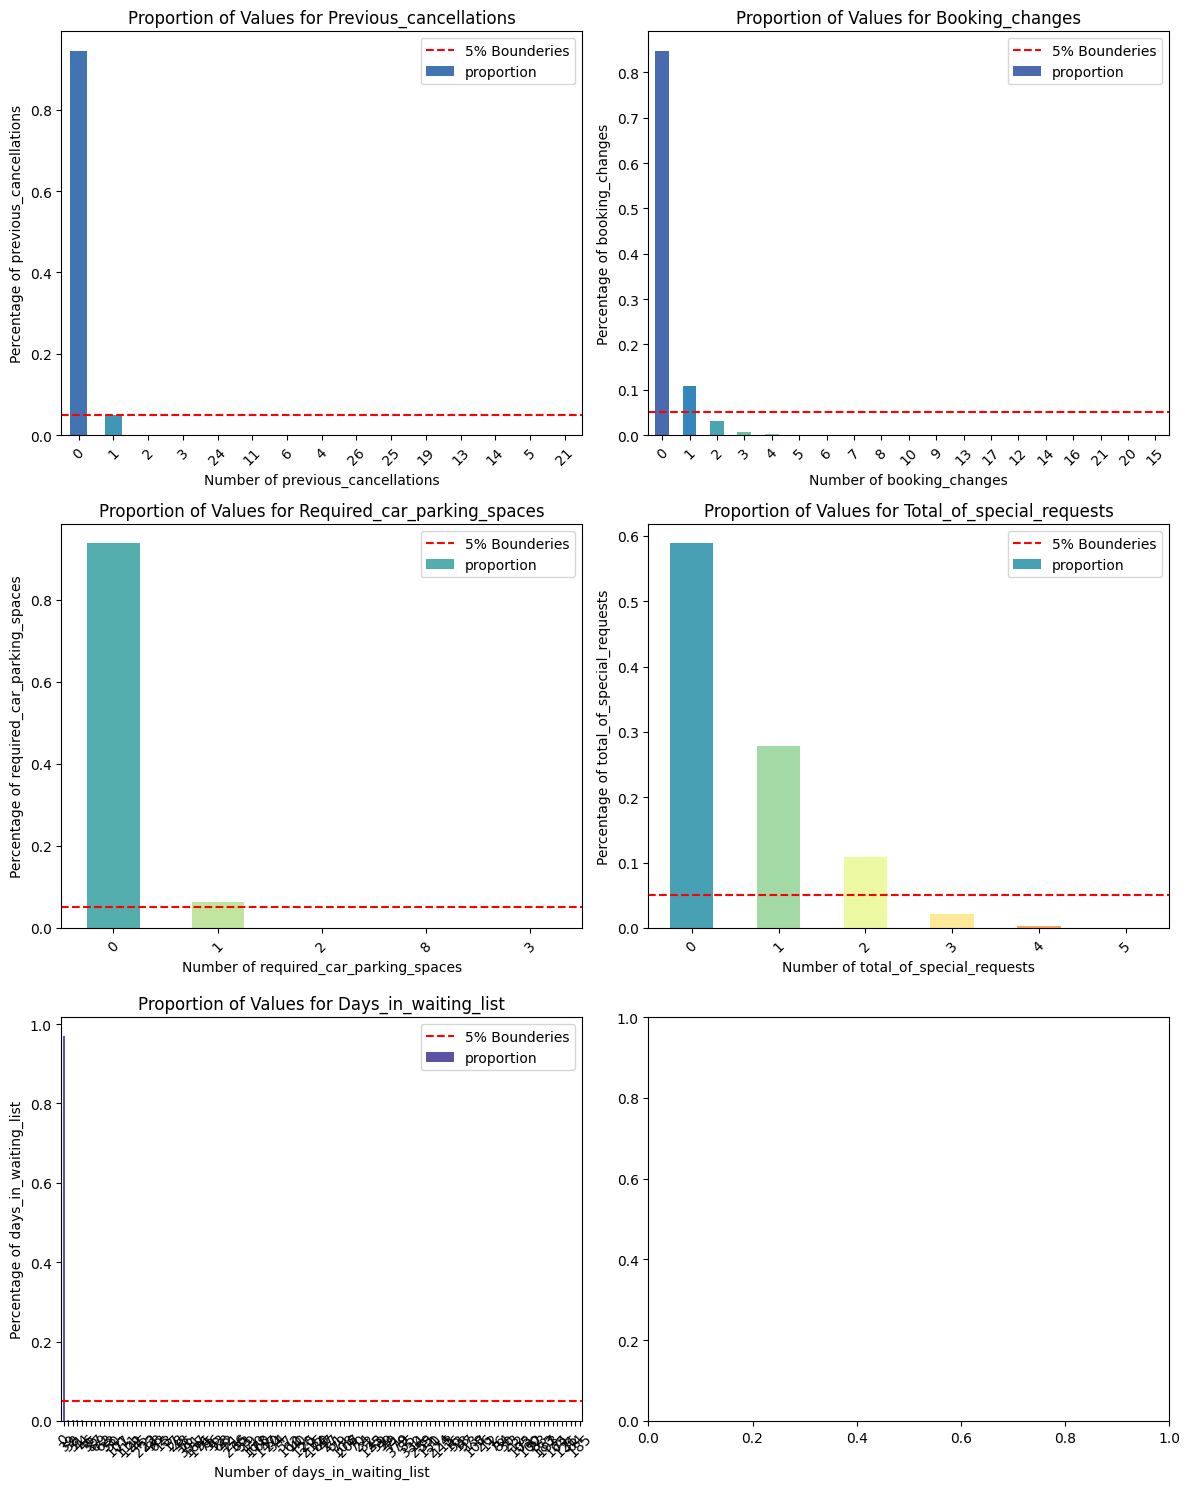

In [73]:
plot_proportions(df, numerical_columns)

From the table above, there are so many rare value. Rare value is where the data or the value of the in a column is less than 5%. For example, in number of previous cancellations, there is a bookings with 21 previous cancellations with only below 5% of customer did it. Another example required parking spaces, while the most customers doesnt need parking spaces, however there are very few customers still require 8 parking spaces.

#### **Categorical Analysis**

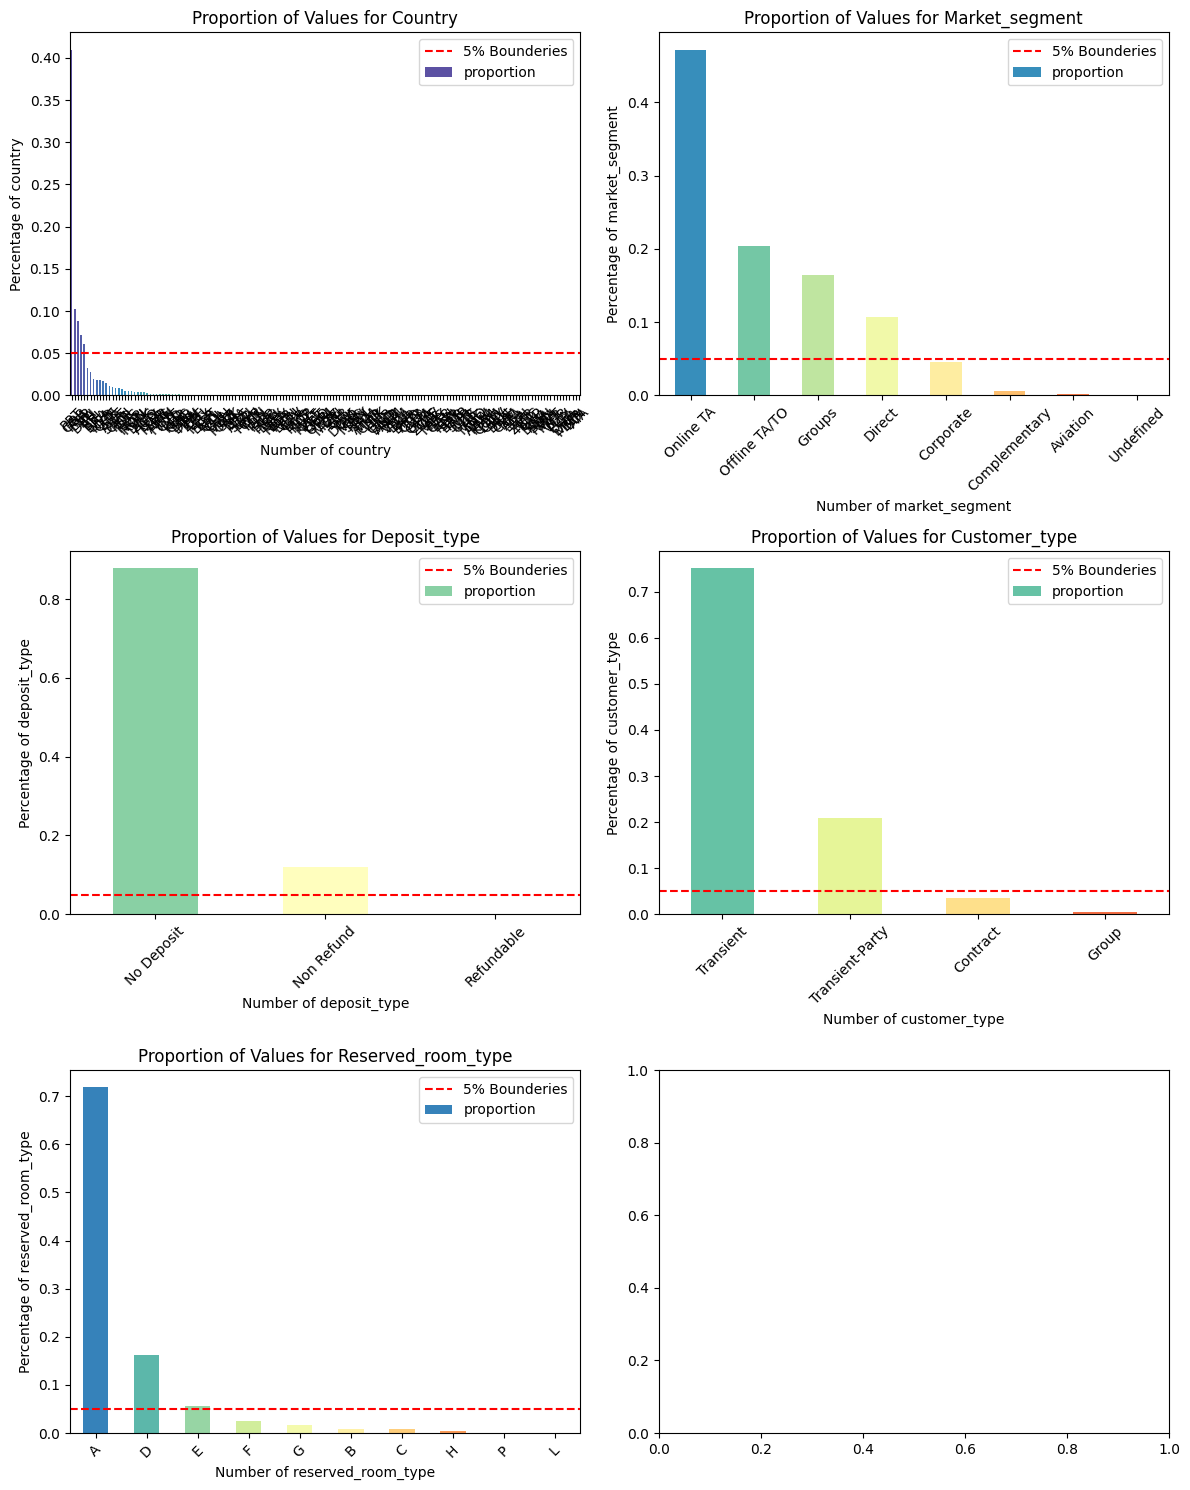

In [74]:
plot_proportions(df, categorical_columns)

From the table above, there are so many rare value. Rare value is where the data or the value of the in a column is less than 5%. For example in, number of Country, there are numerous country that has percentage of value below 5%. Another example in room type, the most popular room type is room A B E while the other room has very few bookings.

<br>

## **Data Preparation and Handling**

#### **Create Supporting Functions**

In [75]:
def find_rare_values(df, column, rare_threshold=0.05):
    value_counts = df[column].value_counts(normalize=True)
    rare_values = value_counts[value_counts <= rare_threshold].index.tolist()
    return rare_values

#### **Handling Missing Value**

<Axes: >

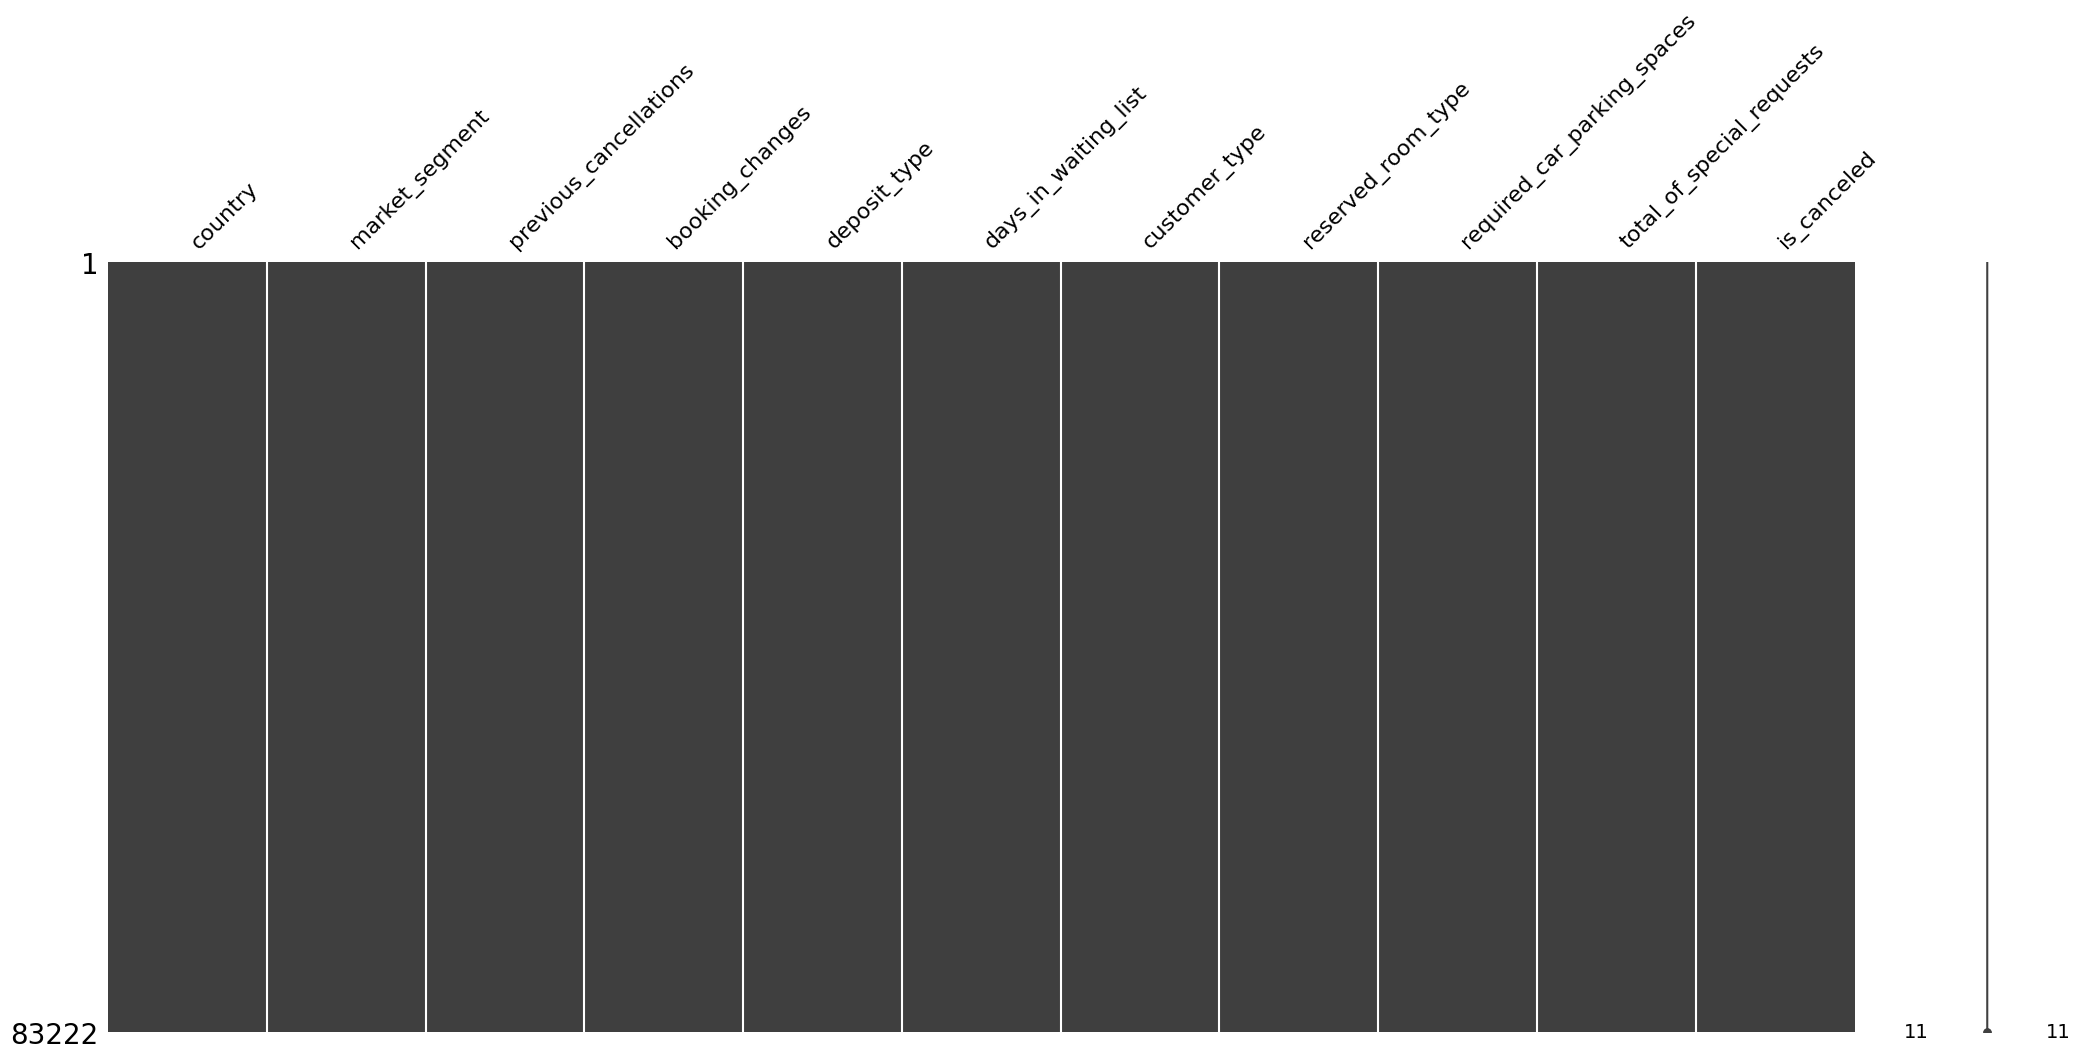

In [76]:
df.dropna(inplace= True)
msn.matrix(df)

After missing columns dropped in the country columns then the remaining rows are 83222 rows.

#### **Handling Duplicate**

the new data row is :  (10084, 11)


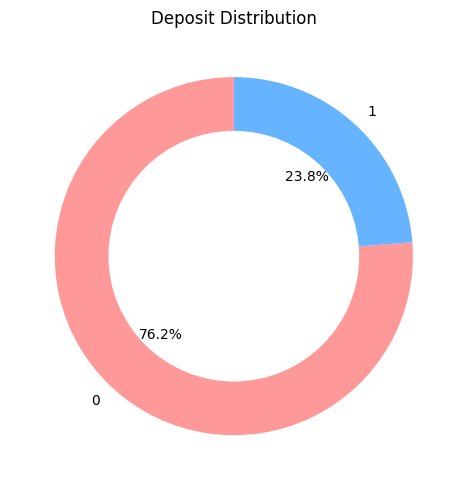

In [77]:
df.drop_duplicates(keep='first', inplace= True)
print('the new data row is : ', df.shape)

cancel_counts = df['is_canceled'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(cancel_counts, labels=cancel_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Deposit Distribution')

# Draw a circle at the center of pie to make it look like a doughnut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()


After data duplicated dropped then the new dataset contains 10.084 rows. However, there is a changes in the imbalance of the data of columns 'is_canceled'. The new ratio of data imbalance is 1:3, means that after getting dropped the imbalance ratio is higher.

#### **Categorical Discretization**

In [78]:
country_mapping = find_rare_values(df, 'country')
market_mapping = find_rare_values(df, 'market_segment')
customer_mapping = find_rare_values(df, 'customer_type')
room_mapping = find_rare_values(df, 'reserved_room_type')

In [79]:
df['country'] = df['country'].apply(lambda x: 'Others' if x in country_mapping else x)
df['market_segment'] = df['market_segment'].apply(lambda x: 'Others' if x in market_mapping else x)
df['customer_type'] = df['customer_type'].apply(lambda x: 'Others' if x in customer_mapping else x)
df['reserved_room_type'] = df['reserved_room_type'].apply(lambda x: 'Others' if x in room_mapping else x)

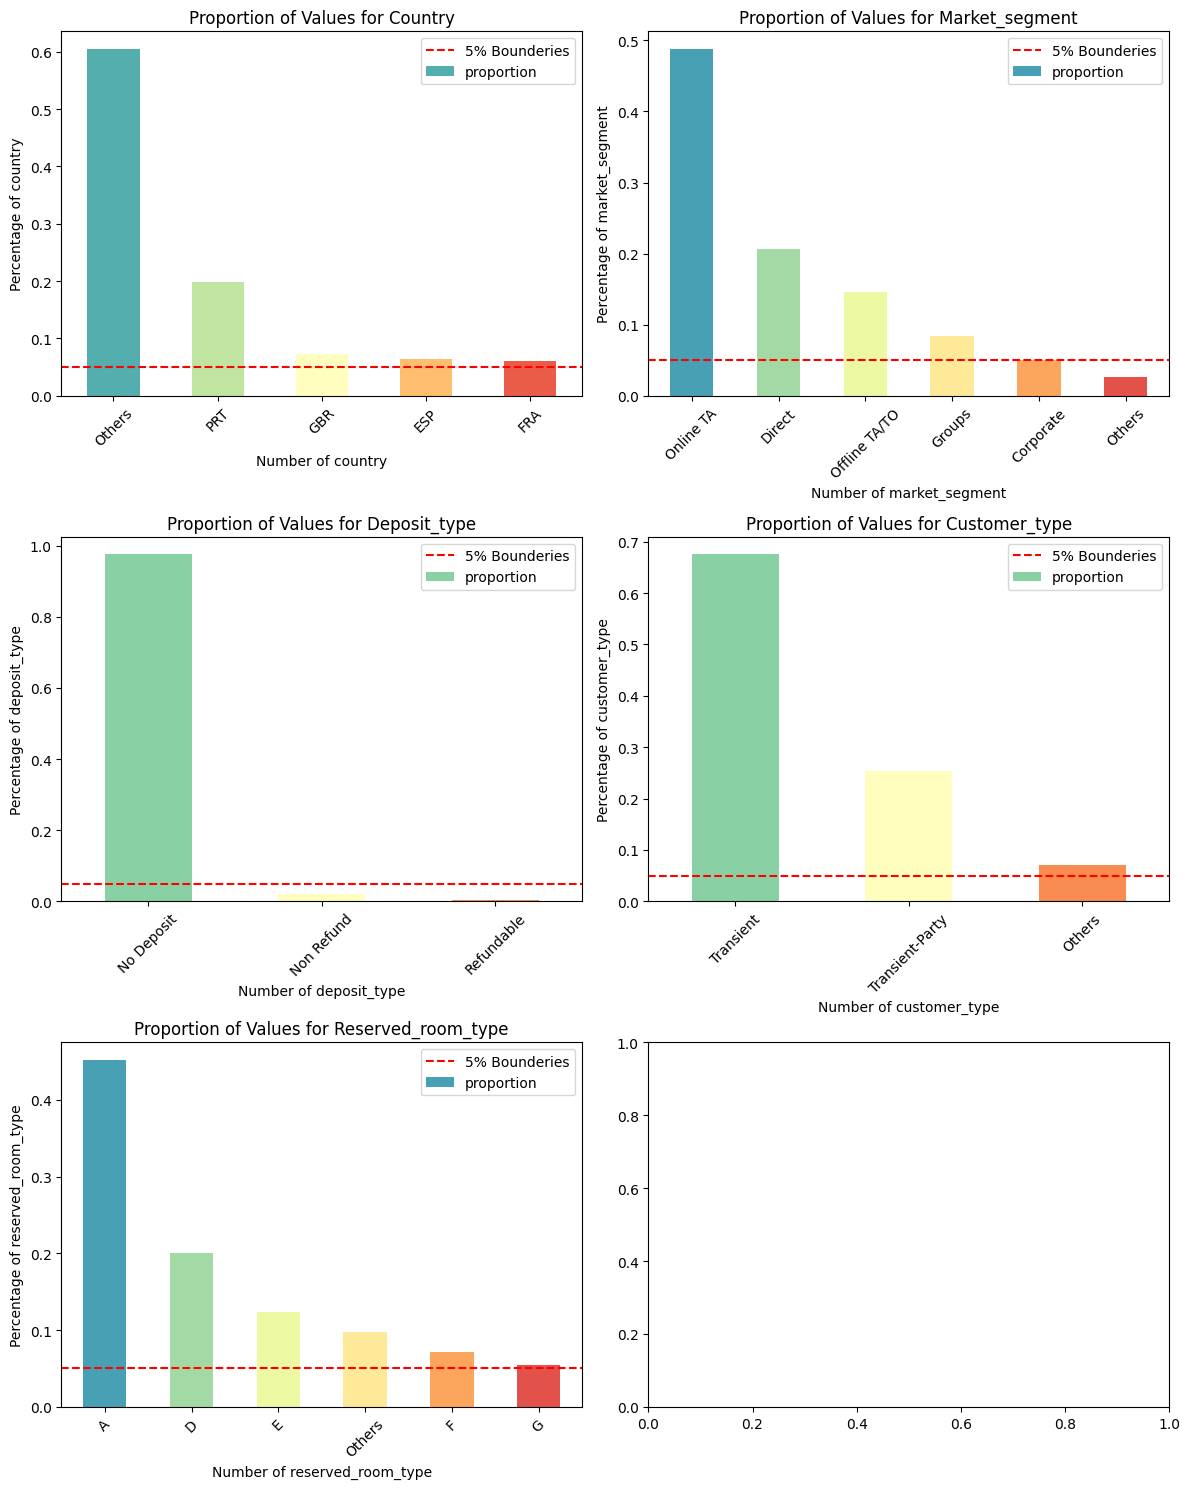

In [80]:
plot_proportions(df, categorical_columns)

After data discretization in the categorical columns, the data that initially have large distributions now the dimensions are reduced. Data discretization transforms the data which previously only below 5%, to become one value that labeled as "Others". The data discretization is needed to reduce cardinality and overfitting

#### **Numerical Discretization**

In [81]:
df['previous_cancellations'] = df['previous_cancellations'].apply(lambda x: 1 if x >= 1 else 0)
df['booking_changes'] = df['booking_changes'].apply(lambda x: 1 if x >= 1 else 2)
df['required_car_parking_spaces'] = df['required_car_parking_spaces'].apply(lambda x: 1 if x >= 1 else 2)
df['days_in_waiting_list'] = df['days_in_waiting_list'].apply(lambda x: 1 if x >= 1 else 0)

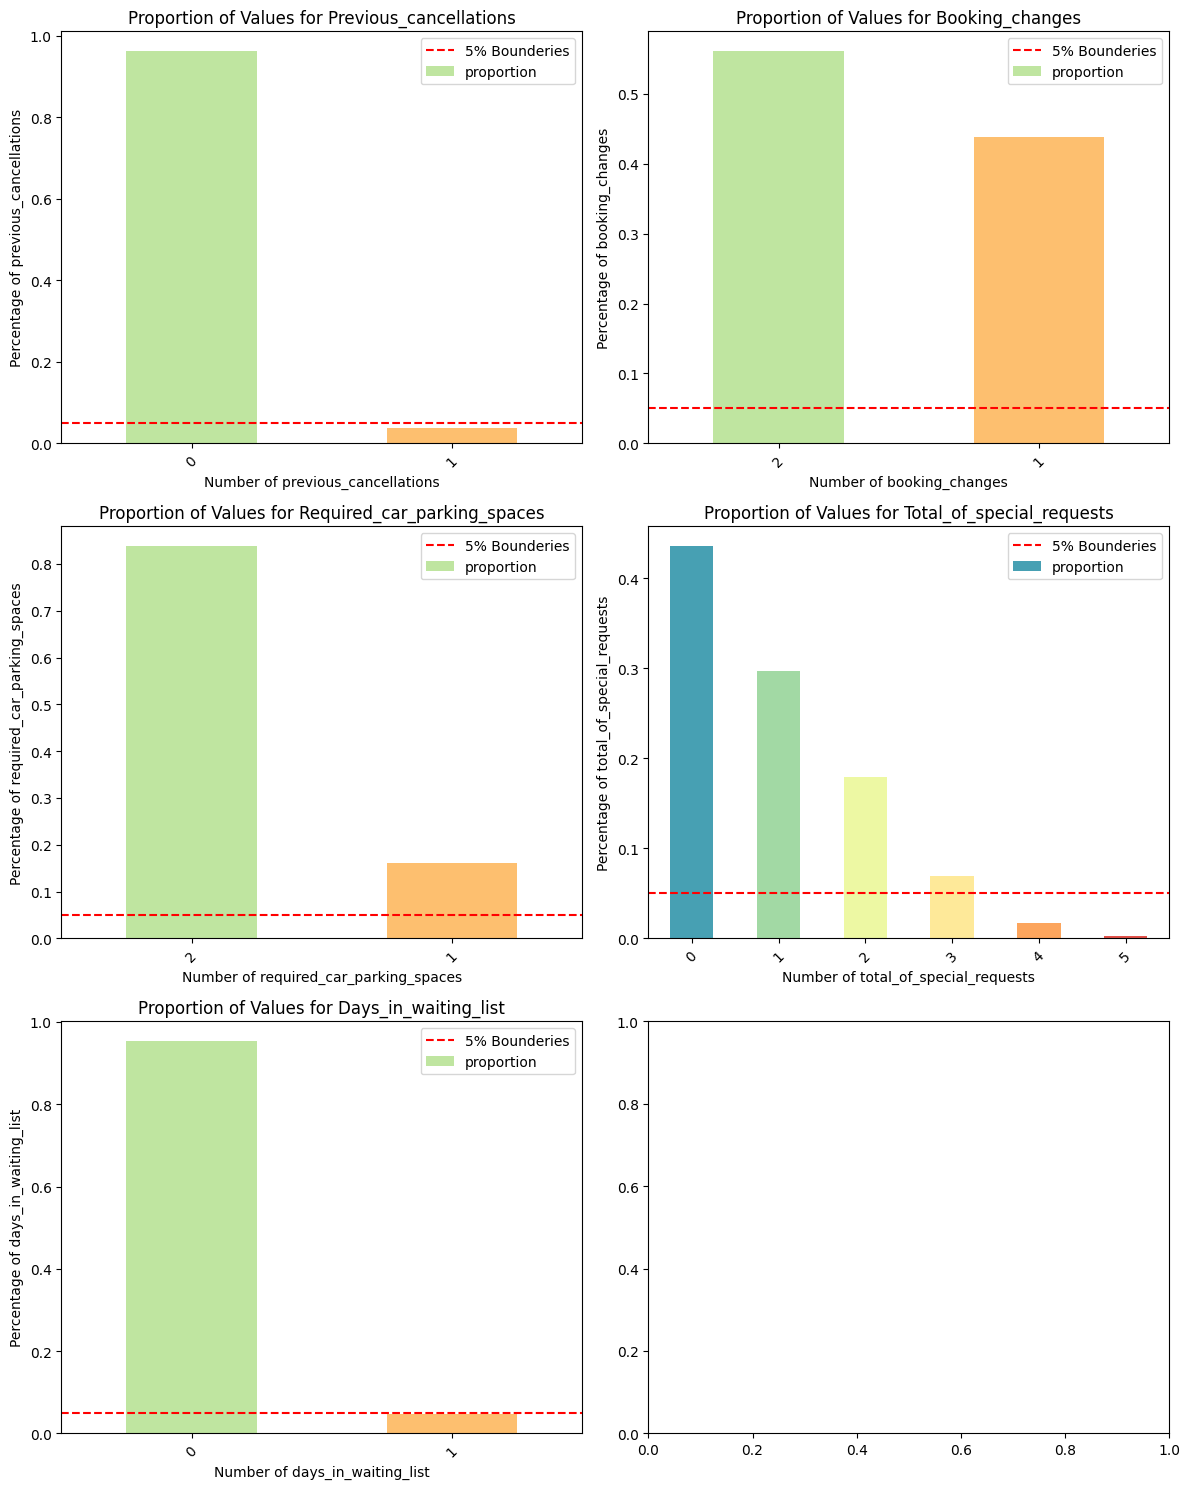

In [82]:
plot_proportions(df, numerical_columns)

The main reason of discretization is similar explanation with the categorical discretization. However, the value that is below 5% will grouped together. For the total special request will not be discretize since the the number of request still relevant to the business, 251 person that has outlier can implies new statement and will be handled by scaler.

<br>

## **Data Splitting**

In [83]:
x = df.drop('is_canceled', axis= 1)
y = df['is_canceled']

r_state = 42

In [84]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state= r_state,
    stratify=y,
    test_size= 0.2
)

In [85]:
df_seen = pd.concat([x_train, y_train], axis=1, join = 'inner')
df_seen.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
414,PRT,Online TA,0,2,No Deposit,0,Transient,A,2,0,1
33896,PRT,Corporate,0,1,No Deposit,0,Transient-Party,A,1,2,0
70467,PRT,Offline TA/TO,0,1,No Deposit,0,Others,A,2,0,0
47929,FRA,Online TA,0,1,No Deposit,0,Transient-Party,F,1,0,0
56976,PRT,Direct,0,1,No Deposit,0,Transient,D,1,0,0


In [86]:
df_unseen = pd.concat([x_test, y_test], axis=1, join = 'inner')
df_unseen.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
8407,Others,Online TA,0,2,No Deposit,0,Transient,F,2,2,0
2740,ESP,Online TA,0,1,No Deposit,0,Transient,D,2,0,1
73399,ESP,Groups,0,1,No Deposit,0,Transient-Party,A,2,0,0
73727,Others,Groups,0,1,No Deposit,0,Transient-Party,A,2,0,0
37752,Others,Online TA,0,1,No Deposit,0,Transient,Others,2,1,1


The data splitting will be separated into 2 data, which is data_seen for the training and data_unseen for the test set.

#### **Save Splitted Dataset**

In [87]:
df_unseen.to_csv('hotel_unseen.csv', index= False)
df_seen.to_csv('hotel_seen.csv', index= False)

<br>

## **Data Modelling**

#### **Import Necessary Module**

In [88]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

from matplotlib.colors import ListedColormap

from collections import Counter
from sklearn.feature_selection import RFE


from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, KBinsDiscretizer, PolynomialFeatures, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_validate

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import plot_tree, DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb

from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, f1_score, recall_score, classification_report, RocCurveDisplay, fbeta_score, make_scorer, balanced_accuracy_score
from sklearn.metrics._scorer import _SCORERS

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import category_encoders as ce
from category_encoders import BinaryEncoder

from imblearn import pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN

import warnings
warnings.filterwarnings('ignore')

# new module
import math
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from scipy.stats import randint

#### **Data Loaded**

In [89]:
df_seen = pd.read_csv('hotel_seen.csv')
df_unseen = pd.read_csv('hotel_unseen.csv')

x_train = df_seen.drop('is_canceled', axis=1)
y_train = df_seen['is_canceled']

x_test = df_unseen.drop('is_canceled', axis=1)
y_test = df_unseen['is_canceled']

In [90]:
display(x_train.shape, x_test.shape)

(8067, 10)

(2017, 10)

In this step, I do data splitting again to define which one is train set and which one is test set. The label is still consistent with 10 columns each.

<br>

## **Preprocessing**
<br>
In this step, i will define all the necessary features and functions for data preprocessing including defining numerical columns, creating the initial transformer and execute transformer testing.

In [91]:
numerical_columns = [col for col in x_train.columns if pd.api.types.is_numeric_dtype(x_train[col])]
categorical_columns = [col for col in x_train.columns if pd.api.types.is_object_dtype(x_train[col])]

display(numerical_columns, categorical_columns)

['previous_cancellations',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']

['country',
 'market_segment',
 'deposit_type',
 'customer_type',
 'reserved_room_type']

#### **Transformer**

In [92]:
transformer = ColumnTransformer([
    ('binary', OneHotEncoder(drop= 'first', sparse_output= False), categorical_columns),
    ('robust', RobustScaler(), ['total_of_special_requests']),
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['country', 'market_segment', 'deposit_type',
                                  'customer_type', 'reserved_room_type']),
                                ('robust', RobustScaler(),
                                 ['total_of_special_requests'])])

This transformer is created to ensure the categorical features will be encoded to onehot and for "days_in_waiting_list" will be transformed using robust scaler. The reason for using onehot encoder is because previously i have made some cardinality adjustment which makes each column has less unique value, therefore if it will be onehot encoded, the column encoded is still countable. The reason for using robust scaler, is because "days_in_waiting_list" has quite many outlier, therefore outlier adjusment using robust scaler is being implemented.

### **Transformer Testing**

In [93]:
pd.DataFrame(data=transformer.fit_transform(x_train), columns=transformer.get_feature_names_out()).sample(3)

,binary__country_FRA,binary__country_GBR,binary__country_Others,binary__country_PRT,binary__market_segment_Direct,binary__market_segment_Groups,binary__market_segment_Offline TA/TO,binary__market_segment_Online TA,binary__market_segment_Others,binary__deposit_type_Non Refund,...,binary__reserved_room_type_D,binary__reserved_room_type_E,binary__reserved_room_type_F,binary__reserved_room_type_G,binary__reserved_room_type_Others,robust__total_of_special_requests,remainder__previous_cancellations,remainder__booking_changes,remainder__days_in_waiting_list,remainder__required_car_parking_spaces
2582,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
4902,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6131,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,1.0,1.0,2.0


In [94]:
pd.DataFrame(data=transformer.transform(x_test), columns=transformer.get_feature_names_out()).sample(3)

,binary__country_FRA,binary__country_GBR,binary__country_Others,binary__country_PRT,binary__market_segment_Direct,binary__market_segment_Groups,binary__market_segment_Offline TA/TO,binary__market_segment_Online TA,binary__market_segment_Others,binary__deposit_type_Non Refund,...,binary__reserved_room_type_D,binary__reserved_room_type_E,binary__reserved_room_type_F,binary__reserved_room_type_G,binary__reserved_room_type_Others,robust__total_of_special_requests,remainder__previous_cancellations,remainder__booking_changes,remainder__days_in_waiting_list,remainder__required_car_parking_spaces
1589,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,2.0,0.0,1.0
669,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0
1147,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,2.0


The Transformer works perfectly for x_train and x_test, this means the column are well encoded and scaled using a proper Transformer.

<br>

## **Benchmark Model**

In this step we are going to do the initial model and comparison named as benchmark model. By using the table of benchmark model we can compare the "Precision" value for class 1 and sort the highest precision.

In [95]:
r_state = 42

The random state that will be used in this modelling is random state 42 and will be labeled as r_state

### **Define Model & Scoring**

In [96]:
models = [
    lgb.LGBMClassifier(random_state= r_state),
    RandomForestClassifier(random_state= r_state),
    GradientBoostingClassifier(random_state= r_state),
    AdaBoostClassifier(random_state= r_state),
    LogisticRegression(random_state= r_state),
    KNeighborsClassifier(),
    XGBClassifier(random_state =r_state)
]

In [97]:
# Define scoring metrics
f05 = make_scorer(fbeta_score, beta=0.5)
f2 = make_scorer(fbeta_score, beta=2)
balanced_acc = make_scorer(balanced_accuracy_score)
specificity = make_scorer(lambda y_true, y_pred: recall_score(y_true, y_pred, pos_label=0))  # Specificity is recall of the negative class
scoring = {'f05': f05, 'f1': 'f1', 'f2': f2, 'recall': 'recall', 'precision': 'precision', 'balanced_accuracy': balanced_acc, 'specificity': specificity}

There are many scoring that we will evaluate in this modelling, however we will only focus for Precision while the other scoring is only for evaluation analysis.

#### **Benchmarking**

In [98]:
benchmark = {'Model Name': [], 'F05 Score': [], 'F1 Score': [], 'F2 Score': [], 'Recall Score': [],
             'Precision Score': [], 'Balanced Accuracy': [], 'Specificity': [], 'Actual Revenue' : [], 'Potential Revenue': [],
             'Budget Needs' : [], 'Recall Std dev': [], 'Precision Std dev': [], 'Resample Name': []}

In [99]:
for model in models:
    estimator = Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])
    
    cv_search = cross_validate(estimator=estimator, X=x_train, y=y_train, scoring=scoring, cv=5, error_score='raise', n_jobs=-1)
    
    x_train_processed = pd.DataFrame(data = transformer.fit_transform(x_train), columns= transformer.get_feature_names_out())
    model.fit(x_train_processed, y_train)

    x_test_processed = pd.DataFrame(data = transformer.transform(x_test), columns= transformer.get_feature_names_out())
    y_pred = model.predict(x_test_processed)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    actual_revenue = tp*90
    potential_revenue = fn*90
    budget = tp*8+fn*8

    benchmark['Model Name'].append(model.__class__.__name__)
    benchmark['F05 Score'].append(cv_search['test_f05'].mean())
    benchmark['F1 Score'].append(cv_search['test_f1'].mean())
    benchmark['F2 Score'].append(cv_search['test_f2'].mean())
    benchmark['Recall Score'].append(cv_search['test_recall'].mean())
    benchmark['Precision Score'].append(cv_search['test_precision'].mean())
    benchmark['Balanced Accuracy'].append(cv_search['test_balanced_accuracy'].mean())
    benchmark['Specificity'].append(cv_search['test_specificity'].mean())
    benchmark['Actual Revenue'].append(actual_revenue)
    benchmark['Potential Revenue'].append(potential_revenue)
    benchmark['Budget Needs'].append(budget)
    benchmark['Recall Std dev'].append(cv_search['test_recall'].std())
    benchmark['Precision Std dev'].append(cv_search['test_precision'].std())
    benchmark['Resample Name'].append('None')

[LightGBM] [Info] Number of positive: 1534, number of negative: 4920
[LightGBM] [Info] Number of positive: 1533, number of negative: 4920
[LightGBM] [Info] Number of positive: 1533, number of negative: 4920
[LightGBM] [Info] Number of positive: 1534, number of negative: 4920
[LightGBM] [Info] Number of positive: 1534, number of negative: 4920
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005342 seconds.
You can set `force_row_wise=true` t

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

In [100]:
pd.DataFrame(benchmark).sort_values(by='Precision Score', ascending= False)

,Model Name,F05 Score,F1 Score,F2 Score,Recall Score,Precision Score,Balanced Accuracy,Specificity,Actual Revenue,Potential Revenue,Budget Needs,Recall Std dev,Precision Std dev,Resample Name
2,GradientBoostingClassifier,0.502452,0.391185,0.320348,0.285863,0.620370,0.615777,0.945691,13860,29250,3832,0.024274,0.026124,None
4,LogisticRegression,0.498473,0.400507,0.334951,0.302057,0.596342,0.619078,0.936098,14220,28890,3832,0.022586,0.028810,None
3,AdaBoostClassifier,0.497616,0.407694,0.345410,0.313514,0.583696,0.621879,0.930244,14760,28350,3832,0.022090,0.034360,None
0,LGBMClassifier,0.476975,0.389504,0.329177,0.298378,0.561047,0.612847,0.927317,14940,28170,3832,0.026347,0.043402,None
6,XGBClassifier,0.474039,0.400757,0.347143,0.318731,0.539940,0.617089,0.915447,15120,27990,3832,0.025346,0.035689,None
1,RandomForestClassifier,0.420263,0.368296,0.327941,0.305676,0.464184,0.597554,0.889431,12330,30780,3832,0.013615,0.030045,None
5,KNeighborsClassifier,0.443257,0.418432,0.396580,0.383393,0.461807,0.621615,0.859837,18810,24300,3832,0.018926,0.030380,None


Based on the table above, it is shown that the model with the highest precision score is Gradient Boosting Classifier (GBC) by 0.62. However, if we analyze using financial perspective, GBC doesnt resulting the best potential revenue with similar budget with Random Forest Classifier (RFC). Therefore, a deeper analysis utilizing both machine learning and financial perspective is needed.

<br>

## **Feature Selection**

In feature selection, I'am using Recursive Feature Elimination (RFE). By using removing irrelevant or less important features, RFE can improve the performance of the model. Moreover, by using RFE, it helps in identifying the most influential features.

In [101]:
x_train_transformed = pd.DataFrame(data=transformer.fit_transform(x_train), columns=transformer.get_feature_names_out())

In [102]:
model = GradientBoostingClassifier(random_state= r_state)
features_transformed = x_train_transformed.columns

x_train_transformed = pd.DataFrame(data = transformer.fit_transform(x_train), columns= transformer.get_feature_names_out())
results = {'Number of Features': [], 'Mean Precision Score': [], 'Selected Features': []}

for n_features in range(1, x_train_transformed.shape[1] + 1):
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    rfe.fit(x_train_transformed, y_train)

    scores = cross_val_score(rfe, x_train_transformed, y_train, cv=5, n_jobs=-1, scoring='precision')

    results['Number of Features'].append(n_features)
    results['Mean Precision Score'].append(np.mean(scores))

    selected_features = np.array(features_transformed)[rfe.support_]
    results['Selected Features'].append(", ".join(selected_features))

# Convert results to DataFrame
results_df = pd.DataFrame(results)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_

In [ ]:
results_df = results_df.sort_values(by='Mean Precision Score', ascending= False).head(5)
results_df

,Number of Features,Mean Precision Score,Selected Features
5,6,0.869651,"binary__country_PRT, binary__market_segment_On..."
4,5,0.833144,"binary__country_PRT, binary__market_segment_On..."
8,9,0.634105,"binary__country_PRT, binary__market_segment_Di..."
10,11,0.633267,"binary__country_PRT, binary__market_segment_Di..."
9,10,0.630974,"binary__country_PRT, binary__market_segment_Di..."


In [ ]:
display(results_df['Selected Features'].iloc[0])

'binary__country_PRT, binary__market_segment_Online TA, binary__deposit_type_Non Refund, binary__customer_type_Transient, remainder__previous_cancellations, remainder__required_car_parking_spaces'

In [ ]:
# PRECISION MEAN TEST
best_features = ['binary__country_PRT', 'binary__market_segment_Online TA', 'binary__deposit_type_Non Refund', 'binary__customer_type_Transient', 'remainder__previous_cancellations', 'remainder__required_car_parking_spaces']

By using RFE, I have found the best columns from encoded x_train. Initially there were 23 columns for encoded x_train, after feature selection I founf that there are 6 features that have the most significant impact to the predicition.

#### **Best Features Testing**

In [ ]:
rfe_table = {'Model Name': [], 'F05 Score': [], 'F1 Score': [], 'F2 Score': [], 'Recall Score': [],
             'Precision Score': [], 'Balanced Accuracy': [], 'Specificity': [], 'Actual Revenue' : [], 'Potential Revenue': [],
             'Budget Needs' : [], 'Recall Std dev': [], 'Precision Std dev': [], 'Resample Name': []}

In [ ]:
for model in models:
    estimator = Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])
    
    cv_search = cross_validate(estimator=estimator, X=x_train, y=y_train, scoring=scoring, cv=5, error_score='raise', n_jobs=-1)
    
    cv_search = cross_validate(estimator=model, X=x_train_transformed[best_features], y=y_train, scoring=scoring, cv=7, error_score='raise')
    
    model.fit(x_train_transformed[best_features], y_train)
    x_test_transformed = pd.DataFrame(data = transformer.transform(x_test), columns= transformer.get_feature_names_out())
    y_pred = model.predict(x_test_transformed[best_features])
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    actual_revenue = tp*90
    potential_revenue = fn*90
    budget = tp*8+fn*8

    rfe_table['Model Name'].append(model.__class__.__name__)
    rfe_table['F05 Score'].append(cv_search['test_f05'].mean())
    rfe_table['F1 Score'].append(cv_search['test_f1'].mean())
    rfe_table['F2 Score'].append(cv_search['test_f2'].mean())
    rfe_table['Recall Score'].append(cv_search['test_recall'].mean())
    rfe_table['Precision Score'].append(cv_search['test_precision'].mean())
    rfe_table['Balanced Accuracy'].append(cv_search['test_balanced_accuracy'].mean())
    rfe_table['Specificity'].append(cv_search['test_specificity'].mean())
    rfe_table['Actual Revenue'].append(actual_revenue)
    rfe_table['Potential Revenue'].append(potential_revenue)
    rfe_table['Budget Needs'].append(budget)
    rfe_table['Recall Std dev'].append(cv_search['test_recall'].std())
    rfe_table['Precision Std dev'].append(cv_search['test_precision'].std())
    rfe_table['Resample Name'].append('None')

[LightGBM] [Info] Number of positive: 1533, number of negative: 4920
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 6453, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237564 -> initscore=-1.166082
[LightGBM] [Info] Start training from score -1.166082
[LightGBM] [Info] Number of positive: 1533, number of negative: 4920
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 6453, number of used features: 23
[LightGBM] [Info] [binary:Bo

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

In [ ]:
pd.DataFrame(rfe_table).sort_values(by = 'Precision Score', ascending= False)

,Model Name,F05 Score,F1 Score,F2 Score,Recall Score,Precision Score,Balanced Accuracy,Specificity,Actual Revenue,Potential Revenue,Budget Needs,Recall Std dev,Precision Std dev,Resample Name
1,RandomForestClassifier,0.387758,0.212146,0.146122,0.121026,0.878713,0.557912,0.994797,6390,36720,3832,0.020523,0.037951,None
6,XGBClassifier,0.387758,0.212146,0.146122,0.121026,0.878713,0.557912,0.994797,6390,36720,3832,0.020523,0.037951,None
0,LGBMClassifier,0.386395,0.211903,0.146077,0.121026,0.868973,0.557668,0.994310,6390,36720,3832,0.020523,0.056469,None
2,GradientBoostingClassifier,0.381065,0.208488,0.143605,0.118943,0.862987,0.556545,0.994147,6390,36720,3832,0.021487,0.062328,None
3,AdaBoostClassifier,0.384836,0.246446,0.181501,0.154417,0.620300,0.562411,0.970404,7740,35370,3832,0.024718,0.052723,None
4,LogisticRegression,0.384836,0.246446,0.181501,0.154417,0.620300,0.562411,0.970404,7740,35370,3832,0.024718,0.052723,None
5,KNeighborsClassifier,0.471765,0.499514,0.559427,0.622848,0.482833,0.683398,0.743948,29520,13590,3832,0.187741,0.121007,None


The table above represents the model scores comparisons, previously we use GBC as our base model since it has the highest testing. However, after feature selection, it can be found that RFC holds the highest precision score amongst the other model especially GBC. It might also answers **previous** anomaly, where **RFC holds the highest potential revenue but second best in precision score**. Thefore, we will proceed the modeling using RFC

#### **Adjusted Transformer**

From the feature selection section, we have known that there are only some important features that impact the predicitions of hotel cancellation. Thefore, we will remade the transformer to adjust the needs of the predictions.

In [ ]:
adj_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown= 'ignore'), ['country', 'market_segment', 'deposit_type', 'customer_type']),
        ('pass', 'passthrough', ['previous_cancellations', 'required_car_parking_spaces'])
    ], remainder='drop')

adj_transformer

ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['country', 'market_segment', 'deposit_type',
                                  'customer_type']),
                                ('pass', 'passthrough',
                                 ['previous_cancellations',
                                  'required_car_parking_spaces'])])

In [ ]:
pd.DataFrame(data = adj_transformer.fit_transform(x_train), columns= adj_transformer.get_feature_names_out())

,onehot__country_FRA,onehot__country_GBR,onehot__country_Others,onehot__country_PRT,onehot__market_segment_Direct,onehot__market_segment_Groups,onehot__market_segment_Offline TA/TO,onehot__market_segment_Online TA,onehot__market_segment_Others,onehot__deposit_type_Non Refund,onehot__deposit_type_Refundable,onehot__customer_type_Transient,onehot__customer_type_Transient-Party,pass__previous_cancellations,pass__required_car_parking_spaces
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
8064,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
8065,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


The adjusted transformer will make sure the columns that will be considered in predictions are the importants columns. By reducing 4 columns from the 10 initial columns, it will help us to avoid overfitting or underfitting predictions.

<br>

## **Model With Resampling**

Since in the data understanding section, we found that there are imbalance class in the hotel cancellations dataset by 1:3 ratio. Therefore, modeling with resampling method is needed to be tested.

#### **Define Resample**

In [ ]:
from imblearn.over_sampling import ADASYN, BorderlineSMOTE, SVMSMOTE

resamples = [
    SMOTE(random_state=r_state),
    SMOTEENN(random_state=r_state),
    RandomOverSampler(random_state=r_state),
    RandomUnderSampler(random_state=r_state),
    NearMiss()
]

In [ ]:
resample_table = {'Model Name': [], 'F05 Score': [], 'F1 Score': [], 'F2 Score': [], 'Recall Score': [],
             'Precision Score': [], 'Balanced Accuracy': [], 'Specificity': [], 'Actual Revenue' : [], 'Potential Revenue': [],
             'Budget Needs' : [], 'Recall Std dev': [], 'Precision Std dev': [], 'Resample Name': []}

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline

for model in models:
    for resample in resamples:
        estimator = ImbPipeline([
            ('adj_transformer', adj_transformer),
            ('resample', resample),
            ('model', model)])

        cv_search = cross_validate(estimator=estimator, X=x_train, y=y_train, scoring=scoring, cv=5, n_jobs = -1, error_score='raise')

        estimator.fit(x_train, y_train)
        y_pred = estimator.predict(x_test)
    
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        actual_revenue = tp*90
        potential_revenue = fn*90
        budget = tp*8+fn*8
    
        resample_table['Model Name'].append(model.__class__.__name__)
        resample_table['F05 Score'].append(cv_search['test_f05'].mean())
        resample_table['F1 Score'].append(cv_search['test_f1'].mean())
        resample_table['F2 Score'].append(cv_search['test_f2'].mean())
        resample_table['Recall Score'].append(cv_search['test_recall'].mean())
        resample_table['Precision Score'].append(cv_search['test_precision'].mean())
        resample_table['Balanced Accuracy'].append(cv_search['test_balanced_accuracy'].mean())
        resample_table['Specificity'].append(cv_search['test_specificity'].mean())
        resample_table['Actual Revenue'].append(actual_revenue)
        resample_table['Potential Revenue'].append(potential_revenue)
        resample_table['Budget Needs'].append(budget)
        resample_table['Recall Std dev'].append(cv_search['test_recall'].std())
        resample_table['Precision Std dev'].append(cv_search['test_precision'].std())
        resample_table['Resample Name'].append(resample)

[LightGBM] [Info] Number of positive: 4920, number of negative: 4920
[LightGBM] [Info] Number of positive: 4920, number of negative: 4920
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 9840, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 4920, number of negative: 4920
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 9840, number of used features: 15
[LightGBM] [In

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

In [ ]:
pd.DataFrame(resample_table).sort_values(by='Precision Score', ascending= False).head(5)

,Model Name,F05 Score,F1 Score,F2 Score,Recall Score,Precision Score,Balanced Accuracy,Specificity,Actual Revenue,Potential Revenue,Budget Needs,Recall Std dev,Precision Std dev,Resample Name
28,KNeighborsClassifier,0.355841,0.198259,0.137538,0.114234,0.768473,0.551832,0.989431,5220,37890,3832,0.023524,0.060798,RandomUnderSampler(random_state=42)
11,GradientBoostingClassifier,0.475407,0.449964,0.463578,0.487251,0.545655,0.662975,0.838699,8910,34200,3832,0.243396,0.102778,SMOTEENN(random_state=42)
6,RandomForestClassifier,0.470560,0.441462,0.448354,0.464824,0.542300,0.656396,0.847967,10800,32310,3832,0.228634,0.101619,SMOTEENN(random_state=42)
31,XGBClassifier,0.470588,0.449035,0.465233,0.490908,0.533581,0.662364,0.833821,11070,32040,3832,0.244961,0.095632,SMOTEENN(random_state=42)
21,LogisticRegression,0.472635,0.453889,0.472379,0.500290,0.528728,0.664047,0.827805,8820,34290,3832,0.241001,0.095364,SMOTEENN(random_state=42)


From the table above, it explains that there is a significant difference in model with our without resampling. With resampling and feature selection, the KNeighborsClassifier (KNN) holds the highest precision score by 0.76 whereas without resampling RFC holds the highest precision score. However, since we want to focus on the highest precision score then we will still proceed with RFC.

<br>

## **Hyperparameter Tuning**

#### **Define the Parameter Grid**

Since, I have decided to proceed with RFC then for the hyperparameter tuning. I will adjust the parameter based on the RFC grid. By setting various option of parameter grid, it will avoid the overfitting or underfiitting.

In [ ]:
param_grid = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth': [10, 20, 30, 40, 50, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False],
}

#### **Best Parameter Finding**

In [ ]:
model = RandomForestClassifier(random_state=r_state)

pipeline = Pipeline([
    ('transformer', adj_transformer),
    ('model', model)
])


model_tuning = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=7, scoring='precision', n_jobs=-1, random_state=r_state)

model_tuning.fit(x_train, y_train)

print("Best parameters found: ", model_tuning.best_params_)

Best parameters found:  {'model__n_estimators': 150, 'model__min_samples_split': 10, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 50, 'model__bootstrap': False}


#### **Best Parameter Tuning Testing**

In [ ]:
tuning_table = {'Model Name': [], 'F05 Score': [], 'F1 Score': [], 'F2 Score': [], 'Recall Score': [],
             'Precision Score': [], 'Balanced Accuracy': [], 'Specificity': [], 'Actual Revenue' : [], 'Potential Revenue': [],
             'Budget Needs' : [], 'Recall Std dev': [], 'Precision Std dev': [], 'Resample Name': []}

In [ ]:
best_model = model_tuning.best_estimator_

cv_search = cross_validate(estimator= best_model, X=x_train, y=y_train, scoring=scoring, cv=5, n_jobs = -1, error_score='raise')

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
    
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
actual_revenue = tp*90
potential_revenue = fn*90
budget = tp*8+fn*8
    
tuning_table['Model Name'].append(model.__class__.__name__)
tuning_table['F05 Score'].append(cv_search['test_f05'].mean())
tuning_table['F1 Score'].append(cv_search['test_f1'].mean())
tuning_table['F2 Score'].append(cv_search['test_f2'].mean())
tuning_table['Recall Score'].append(cv_search['test_recall'].mean())
tuning_table['Precision Score'].append(cv_search['test_precision'].mean())
tuning_table['Balanced Accuracy'].append(cv_search['test_balanced_accuracy'].mean())
tuning_table['Specificity'].append(cv_search['test_specificity'].mean())
tuning_table['Actual Revenue'].append(actual_revenue)
tuning_table['Potential Revenue'].append(potential_revenue)
tuning_table['Budget Needs'].append(budget)
tuning_table['Recall Std dev'].append(cv_search['test_recall'].std())
tuning_table['Precision Std dev'].append(cv_search['test_precision'].std())
tuning_table['Resample Name'].append(resample)

In [ ]:
pd.DataFrame(tuning_table)

,Model Name,F05 Score,F1 Score,F2 Score,Recall Score,Precision Score,Balanced Accuracy,Specificity,Actual Revenue,Potential Revenue,Budget Needs,Recall Std dev,Precision Std dev,Resample Name
0,RandomForestClassifier,0.402098,0.226104,0.157422,0.13093,0.849884,0.561725,0.99252,7290,35820,3832,0.022,0.076895,NearMiss()


from the hyperparmeter tuning result, it can be found that RFC with some adjustment on the model gain lower precision score than RFC without tuning. It implies that, the best model for prediciting data test is RFC with feature selection without tuning nor resampling.

<br>

## **Best Model to Test**

In [ ]:
model = RandomForestClassifier(random_state=r_state)
adj_transformer

ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['country', 'market_segment', 'deposit_type',
                                  'customer_type']),
                                ('pass', 'passthrough',
                                 ['previous_cancellations',
                                  'required_car_parking_spaces'])])

In [ ]:
estimator = Pipeline([
    ('adj transformer', adj_transformer),
    ('model', model)
])

estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1538
           1       0.91      0.17      0.28       479

    accuracy                           0.80      2017
   macro avg       0.85      0.58      0.58      2017
weighted avg       0.82      0.80      0.74      2017



<Axes: >

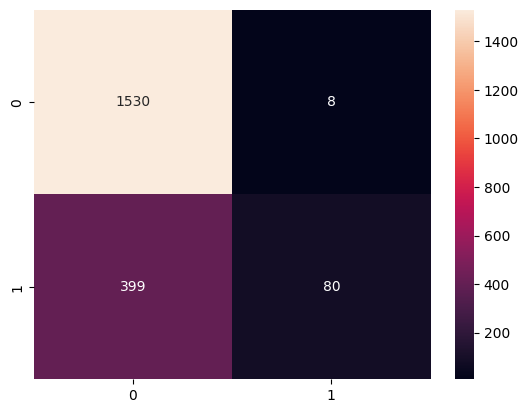

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt=".4g")

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
actual_revenue = tp*90
potential_revenue = fn*90
budget = tp*8+fn*8
wasted_cost = tn*8

print(f'The actual revenue will be received {actual_revenue} USD')
print(f'The potential revenue can be achieved {potential_revenue} USD, with budget of {budget} USD')
print(f'The total revenue predicted to be received if the predicted not cancel customer trully not cancling {actual_revenue+potential_revenue} USD')

The actual revenue will be received 7200 USD
The potential revenue can be achieved 35910 USD, with budget of 3832 USD
The total revenue predicted to be received if the predicted not cancel customer trully not cancling 43110 USD


<br>

## **Upload Model**

The model that has been trained are now ready to be deployed and used. Therefore, I will upload the machine learning into the local and will be later will be loaded to predict the dataset.

In [ ]:
import pickle

model = RandomForestClassifier(random_state = r_state)

estimator = Pipeline([
    ('transformer', adj_transformer),
    ('model', model)
])

estimator.fit(x_train, y_train)

model_file = 'Hotel Model Prediction.pkl'

with open(model_file, 'wb') as f:
    pickle.dump(estimator, f)

<br>

## **Conclusion & Recommendation**

The hotel spending without machine learning is a lot bigger than the spending with machine learning. Without machine learning, company spends more than 16.136 EURO. While with machine learning, company only spends 12-15 thousand euros which can save cost of the company up to 24%. As a data scientist, I recomend the hotel to implement machine learning in order to reduce unecessary cost. Moreover to understand more about customers, its better to achieve an important details of the customer outside that features.